# Linear regression for prediction

Signification des émoticones :
- 🌞 : documentations importantes
- 👀 : documentations intéressantes à connaître
- 🌚 : en complément
- (vide) : à vous de voir

-------

For the remainder of the module we will look at using linear regression in a more algorithmic/computer science/machine learning context. In this notebook we will take a more detailed look at conducting linear regression in `scikit-learn`, you will:
* write your own code to compute MSE
* Learn what training and testing sets are
* Use `scikit-learn` to perform a multiple linear regression
* Evaluate your results
* Create a model to predict housing prices


## Assesing model accuracy

We always must evaluate how 'good' our model is in order to understand how it performs. One common measure of accuracy (or error) for a regression type problem is **Mean Squared Error (MSE)**. This can be calculated using the following formula:

<!-- <div style="font-size: 120%;">   -->
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
<!-- </div> -->

where $y_i$ is the true values and $\hat{f}(x_i)$ is the predicted values by our model over $n$ samples.

### Exercise 1: write a function to calculate MSE

Given the lists of true values and predictions write a function that calculates the MSE of this data. 


HINT
* using numpy arrays will make this much easier.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]
y = np.array(true_values)
y_hat = np.array(predicted_vals)

In [4]:
#args checking
def check_args(y1:np.ndarray,y2:np.ndarray):
    """
    y1 = np.array(...), 1D array
    y2 = np.array(...), 1Darray
    """
    if len(y)!=len(y_hat) or len(y)==0 or len(y_hat)==0:
        raise ValueError("args must have the same positive length")
    return(None)
#values 
def value_SSR(y,y_hat):
    """
    y = np.array(...), 1D array
    y_hat = np.array(...), 1Darray
    """
    check_args(y,y_hat)
    return(sum((y-y_hat)**2))

def value_SST(y):
    """
    y = np.array(...), 1D array
    """
    check_args(y,y)
    return(sum((y-y.mean())**2))

#metrics
def metric_MSE(y:np.ndarray,y_hat:np.ndarray):
    """
    y = np.array(...), 1D array
    y_hat = np.array(...), 1Darray
    """
    if len(y)!=len(y_hat) or len(y)==0 or len(y_hat)==0:
        raise ValueError("args must have the same positive length")
    return(sum((y-y_hat)**2)/(len(y)))

def metric_RMSE(y,y_hat):
    """
    y = np.array(...), 1D array
    y_hat = np.array(...), 1Darray
    """
    check_args(y,y_hat)
    return(np.sqrt(metric_MSE(y,y_hat)))

def metric_R2(y,y_hat):
    """
    y = np.array(...), 1D array
    y_hat = np.array(...), 1Darray
    """
    check_args(y,y_hat)
    return(1-(value_SSR(y,y_hat)/value_SST(y)))

def metric_MAE(y,y_hat):
    """
    y = np.array(...), 1D array
    y_hat = np.array(...), 1Darray
    """
    check_args(y,y_hat)
    return(sum(np.abs(y-y_hat))/len(y))

### MSE evaluation in sklearn

`Scikit-Learn` provides a function to calculate MSE (as well as other useful performance metrics) so that you dont have to carry around your function to all the different projects you work on. We can use this to evaluate our function and check that we got the correct answer in the exercise above.

In [5]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error


**Task 1**: Other evaluation metrics
* Find at least 2 other metrics that exist in `Scikit-Learn` that can be used in regression problems.
* Calculate the errors of these on the hypothetical data we used above.

$$ R² = 1 - \frac{SSR}{SST}= 1 -\frac{\sum_{i=1}^n (y_i − \hat{y}_i)^2}{\sum_{i=1}^n (y_i − \bar{y}_i)^2} (Sum Square residuals,Sum Square totals)$$
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2 (Mean Square Error)$$
$$ RMSE = \sqrt{MSE} (Root MSE)$$
$$ MAE = \frac{\sum_{i=1}^n |y_i − \hat{f}(x_i)|}{n} (Mean Absolute Average)$$

In [6]:
print(f"R^2:\n{r2_score(y,y_hat)}\t\t\t(sk)\n{metric_R2(y,y_hat)}\t\t\t(Homemade)")
print(f"MSE:\n{mean_squared_error(y,y_hat)}\t\t\t(sk)\n{metric_MSE(y,y_hat)}\t\t\t(Homemade)")
print(f"RMSE:\n{root_mean_squared_error(y,y_hat)}\t\t\t(sk)\n{metric_RMSE(y,y_hat)}\t\t\t(Homemade)")
print(f"MAE:\n{mean_absolute_error(y,y_hat)}\t\t\t(sk)\n{metric_MAE(y,y_hat)}\t\t\t(Homemade)")

R^2:
0.9814576407970332			(sk)
0.9814576407970332			(Homemade)
MSE:
0.7720000000000011			(sk)
0.7720000000000011			(Homemade)
RMSE:
0.8786353054595525			(sk)
0.8786353054595525			(Homemade)
MAE:
0.6800000000000004			(sk)
0.6800000000000004			(Homemade)


## Training and testing sets

When building models for prediction we are most interested in building a model that will generalise well to new sets of data that we will encounter in the future. Strictly speaking what we have calculated above is a *training MSE*, which means that the calculation of MSE was performed on the same data samples the model was fitted to. 
 
One good way to asses whether our model will be useful on new data sets is to fit our model only to a subset of the data, and then use new data the model has not seen to produce a prediction which we can evaluate. We saw this process in the previous notebook when we introduced `scikit-learn` and Logistic Regression.

Here is another example:

In [7]:
from sklearn.datasets import load_diabetes
diabs = load_diabetes()

In [8]:
print(diabs.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
diabs.data.shape

(442, 10)

In [10]:
diabs.target.shape

(442,)

In [11]:
import pandas as pd

X = pd.DataFrame(diabs.data, columns=diabs.feature_names)
y = diabs.target

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
pd.DataFrame(y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


We split the data into a test and training set.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18)
n,n_test,n_train = len(y), len(y_test), len(y_train)
train_ratio,test_ratio = n_train/n*100, n_test/n*100
print(f"Train ratio : {train_ratio:1.3f} % ({n_train}/{n}),\t\t\t test ratio : {test_ratio:1.3f} % ({n_test}/{n})")

Train ratio : 74.887 % (331/442),			 test ratio : 25.113 % (111/442)


Fitting a linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# predict y values for testing data set
y_pred_test = model.predict(X_test)

# evaluate MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('test MSE: {0}'.format(mse_test))
# evaluate RMSE
mse_test_RMSE = root_mean_squared_error(y_test, y_pred_test)
print('test RMSE: {0}'.format(mse_test_RMSE))

test MSE: 3006.0739900867497
test RMSE: 54.82767540290897


We can also use this model to predict values on the train set, and evaluate the MSE. Comparing the two MSE scores gives us information on whether the model is overfitting or not. Normally we would compare these scores with other types of models (for example *support vector machines* or *random forests*...) that we have built in order to understand which model is best for the particular problem we are trying to solve. We almost always expect the *training error* to be lower than the *test error* (i.e. our performance reduces (or MSE increases) slightly when we move to new data the model has not seen.

In [16]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('training MSE: {0}'.format(mse_train))
# evaluate RMSE
mse_test_RMSE = root_mean_squared_error(y_train, y_pred_train)
print('test RMSE: {0}'.format(mse_test_RMSE))

training MSE: 2864.8930035730586
test RMSE: 53.5246952683811


## Note: interpreting MSE

MSE is not particularly intuitive to help understand how well your model predicts. In order to interpret how well our model is doing we could convert MSE to something with similar units to the target variable by taking the square root. This would be **Root Mean Squared Error** or **RMSE**.

<br/>

<!-- <div style="font-size: 120%;"> -->
$$ RMSE = \sqrt{MSE}$$
<!-- </div> -->

In [17]:
import numpy as np

In [18]:
rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

RMSE: 54.82767540290897


If we do some simple descriptive stats on the target variable for the training set, we can see that our model is finding a solution on average within one standard deviation of the variance of the target. This type of analysis can give us some confidence whether our model is remotely useful or not!

In [19]:
mean  = np.mean(y_train)
std = np.std(y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

Mean (standard deviation) values of target variables in train set: 150.93655589123867 (76.63854952919398)


RMSE, MSE, R2 squared: further reading

* 🌚 https://stats.stackexchange.com/questions/242787/how-to-interpret-root-mean-squared-error-rmse-vs-standard-deviation
* 🌚 https://setosa.io/ev/ordinary-least-squares-regression/
* 👀 https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

## Correlation between predictor variables (or features)

Correlation between two (or more) predictive variable means that there is a statistical relation between these two variables. This can be causal or not. When two variables are highly correlated (> 0.5), than they are collinear. This can be problematic. In the presence of collinearity between two or more predictors, it is difficult to isolate the impact of each of that predictor on the response. Multicollinearity has an impact on the coefficients and p values of those coefficients. But it does not impact the precision of the predictions. So depending on the goal (first notebook, classical statistics or machine learning) it is desirable to take out features that are correlated. Also in the case of ML, when we have a dataset with a large number of predictors, taking out variables that are collinear helps to reduce the dimensions and make a simplar more stable model.


(Further reading, see page 73, 74, 99 of ILS book).
🌚 https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

Two methods:
* make a correlation matrix and decide what variables to leave out. (0.1 = moderate, 0.5 = large)
* Use variance inflaction factor method to leave out columns / features (if VIF > 5, leave out column)

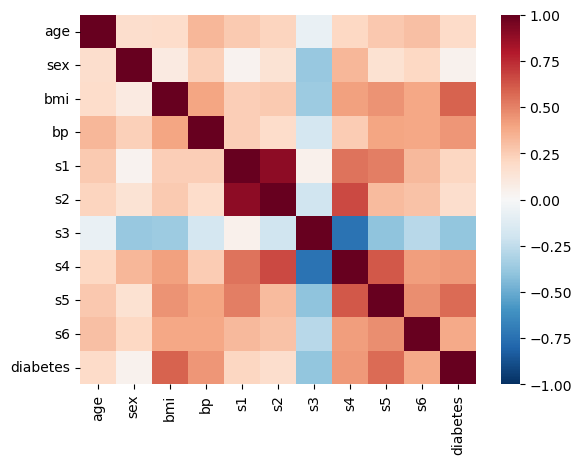

In [20]:
# Correlation matrix
df = pd.concat([X, pd.Series(y)], axis=1)
df = df.rename(columns={0:'diabetes'})

import seaborn as sns
_ = sns.heatmap(df.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

In [36]:
#displaying large correlations
df_corr = df.corr()
for i in range(len(df_corr.index)):
    df_corr.iloc[i][i]=pd.NA
seuil = 0.4
df_corr_max,df_corr_min = pd.DataFrame(),pd.DataFrame()
df_corr_max['max_v'] = df_corr.max()
df_corr_max['idmax'] = df_corr.idxmax()
df_corr_min['min_v'] = df_corr.min()
df_corr_min['idmin'] = df_corr.idxmin()
display((df_corr_max[df_corr_max.max_v > seuil]).sort_values(by='max_v',ascending=False))
display((df_corr_min[df_corr_min.min_v < -seuil]).sort_values(by='min_v'))


/tmp/ipykernel_23188/3996615417.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_corr.iloc[i][i]=pd.NA
/tmp/ipykernel_23188/3996615417.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future versio

,max_v,idmax
s1,0.896663,s2
s2,0.896663,s1
s4,0.659817,s2
s5,0.617859,s4
bmi,0.586450,diabetes
diabetes,0.586450,bmi
s6,0.464669,s5
bp,0.441482,diabetes


,min_v,idmin
s3,-0.738493,s4
s4,-0.738493,s3


From the above matrix we see that bmi (predictor) is strongly correlated to diabetes (response). As a predictor, bmi is strongly related to bp. To make a regression model we could take out bp without impacting the accuracy of the prediction of diabetes. This results in a simpler and smaller model.

In [38]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X
variables.shape
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif[vif['VIF']>5]

,VIF,features
4,59.202510,s1
5,39.193370,s2
6,15.402156,s3
7,8.890986,s4
8,10.075967,s5


Leaving out the above columns should not impact the precision of prediction. But it results in a smaller and simpler model. Also, the std error and confidence interval of the coefficients should be smaller. But be carefull, deleting all features with high collinearity, may lead to deleting the feature that is the best predictor for the response. So first check the correlation between features you want to delete and the (cor)relation with the response variable.

## Exercise 2: Linear regression prediction of house prices

The California housing market is booming and, as it is the home of silicon valley, the housing company **Homes4You** have decided they want to use new data science techniques to aid their business. They want you to build a predictive model that provides the median house price for each local area across the state (These local areas are often called *'blocks'*). They will use this to help guide their agents in how to price houses.

They have gathered a data set with numerous features to assist in building your model. However, they prefer to include as few features as possible to minimize the time their agents will spend collecting data in the future.


Your mission is to apply a regression model to predict housing prices in California.
* Import the data the company has collected using the sklearn function `fetch_california_housing`
* Make a heatmap of the correlation coefficiencts between the variables
* Split the data into a training and testing set
* Build a linear regression model using all the variables available and print the train and test MSE scores.
* Try building other models with different combinations of variables. Print the train and test MSE scores of at least 2 of these models.
* Provide a recommendation to Homes4You of which variables you would include in the model.
* Print the train and test **RMSE** scores of your final model and explain in a few sentences to Homes4You how well your model is performing. 

In [39]:
#### your solution here
X = pd.DataFrame(diabs.data, columns=diabs.feature_names)
y = diabs.target

**Task 3: Explain this to your neighbour...**
* The training and test errors are quite close. What does this mean? 



<details><summary>HINT</summary><br>
HINT: think in terms of if we were to apply this fitted model to new data the model has not seen.

</details>

* If your MSE & RMSE results are different to those of your peers (even when using the same features and model), why might this be? 



**Task 4:**
* Try to load the 'boston house price' (do some further research, what is the issue here?). 
* Try to load 'Linnerrud' data set that comes with sklearn? Try to build a model